In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd
%matplotlib inline

In [23]:
X,y = make_blobs(n_samples = 1000,centers = 3,n_features = 2,random_state = 23)

In [24]:
X.shape

(1000, 2)

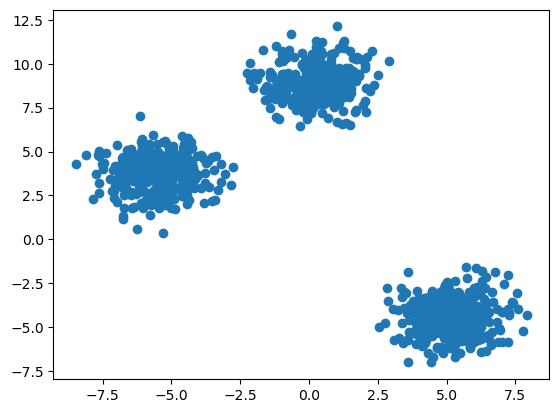

In [27]:
plt.scatter(X[:,0],X[:,1])

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state = 42)

In [32]:
from sklearn.cluster import KMeans

In [34]:
## Manual Method
## elbow method to select the k values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [35]:
wcss

[34827.57682552022,
 7935.437286145418,
 1319.2730531585603,
 1140.4677884655127,
 992.1300308656067,
 854.2282213574907,
 764.6755424433653,
 665.2447097840976,
 578.8707102097808,
 533.5515696102092]

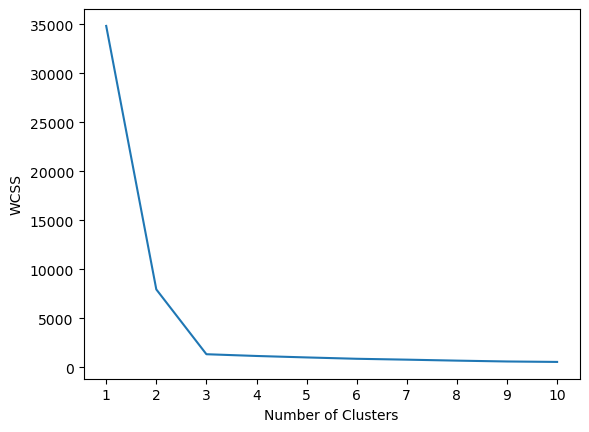

In [36]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [37]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [45]:
y_labels = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


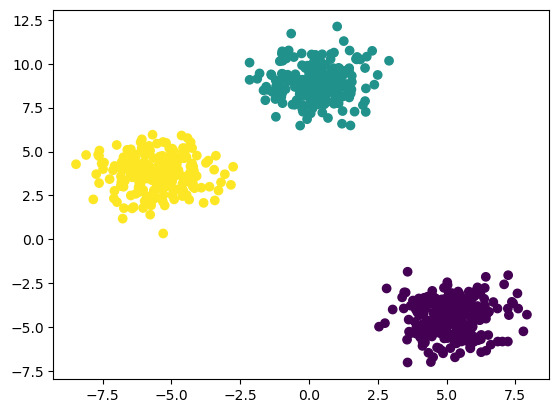

In [46]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [50]:
y_test_label = kmeans.predict(X_test)

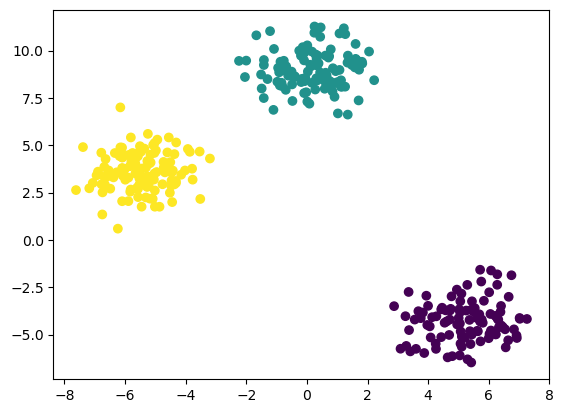

In [52]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [53]:
## knee locator
!pip install kneed

In [54]:
from kneed import KneeLocator

In [57]:
kl = KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')
kl.elbow

3

In [61]:
## Performance Matrices
from sklearn.metrics import silhouette_score

In [63]:
sil_coef = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    sil_coef.append(score)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [64]:
sil_coef

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.4907093255057165,
 0.33691828928108875,
 0.3417095402228698,
 0.3492617247267003,
 0.3397675908472513,
 0.3443133057063672]

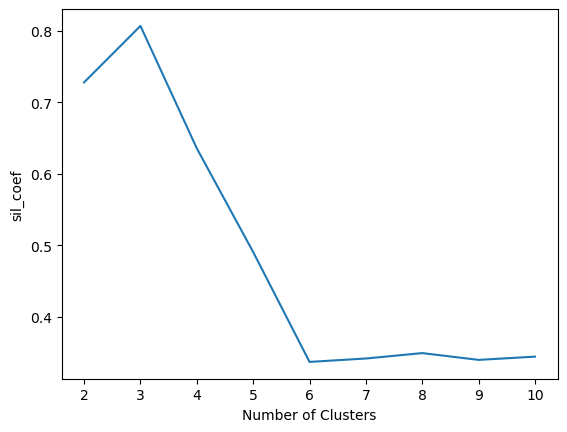

In [66]:
plt.plot(range(2,11),sil_coef)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("sil_coef")
plt.show()